<a href="https://colab.research.google.com/github/sjcorp/notebooks/blob/master/ml_fundamentals/ml_feature_engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lifecycle of a Data Science Project

1. Data Collection Strategy - Company Databases, 3rd Party APIs, Surveys
2. Feature Engineering - Handling Missing Values

# Handling Missing Values

What are the different types of missing data?
- MCAR: Missing completely at Random; in such cases disregarding those cases would not bias the inferences made.
- MNAR: Missing not at Random
- Missing at Random

Two types of data could be missing:
- Continuous Data
- Categorical Data


# MNAR

In [ ]:
# Random Sample Imputation

import pandas as pd
df = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/titanic_train.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()
# Here Cabin and Age have a lot of NAN values and they are not missing at random. Its because data was collected post the accident.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# MCAR

In [ ]:
# Cabin value missing for people that survived
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [ ]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Missing at Random

- Men not quoting Salary
- Women not quoting Age

# Techniques of handling missing values

1. Mean/Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN Values with a New Feature
4. End of Distribution Imputation
5. Arbitrary Imputation
6. Freqyent Categories Imputation

# Categorical Value Imputation

# Mean Median Mode Imputation

When?
- Data is missing completely at Random

How?
- Replace the NAN with most feequent occurance of variable

Advantages:
- Easy to implement
- Robust for outliers
- Fastest way to complete the dataset

Disadvantages:
- Distortion to the original variance


In [ ]:
# Random Sample Imputation

import pandas as pd
df = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
def impute_nan(df, variable, median):
  df[variable+'_median'] = df[variable].fillna(median)

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
# Check if it has changed the normal distribution

print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

NameError: ignored

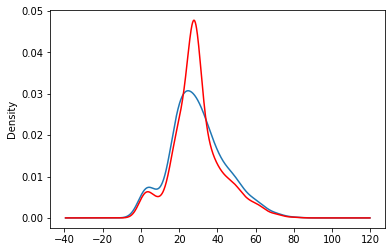

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax = ax)
df['Age_median'].plot(kind='kde', ax=ax,color='red')
lines, lables = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Random Sample Imputation

When: Data is missing completely at random (MCAR)

How: Take random observation from the dataset to replace NAN values

Pros:
- Easy to implement
- Less distortion in variance

Cons:
- In every situation, randomness wont work

In [ ]:
# Random Sample Imputation

import pandas as pd
df = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# Code to find out NULL Values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df['Age'].isnull().sum()

177

In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df['Age'].dropna().sample()

316    24.0
Name: Age, dtype: float64

In [ ]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state = 0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [ ]:
def impute_nan(df, variable, median):
  df[variable+"_median"] = df[variable].fillna(median)
  df[variable+"_random"] = df[variable]
  ## It will fill up the NA value with the random sample
  random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  ## pandas need to have some index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [ ]:
median = df.Age.median()
median

28.0

In [ ]:
impute_nan(df,"Age",median)

In [ ]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

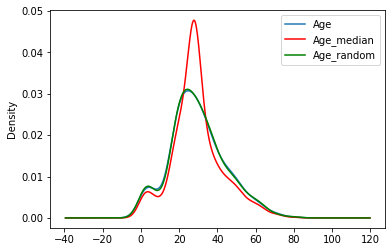

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax,color='red') # Just to check distortionin the variance
df.Age_random.plot(kind='kde', ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')

# Capturing NAN Values with a New Feature

When: When missing values are not at random (MNAR)

How: Create a new replacement feature (1 if missing, 0 if not missing)

Pros:
- Easy to implement
- Captures importance of missing values (by 1,0 as a flag)

Cons:
- Creates additional features (curse of dimensonality)

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
df = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [ ]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
df.Age.median()

28.0

In [ ]:
df['Age'].fillna(df.Age.median(),inplace=True) # Missing value has already been captured by flag. This will help in evaluating the importance of age.

In [ ]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


# End of distribution imputation

When: When missing values are not at random (MNAR)

How: Take far end of the distribution & replace them

Pros:

- Easy to implement
- Captures the importance of missing values

Cons:

- Distorts the original distribution of variables
- If missing data is not important, it may mask the predictive power of the original variable by distorting the distribution
- If the number of NA is big, it will mask true outliers in the distribution
- If the number of NA is small, the replaced NA may be considered an outlier and pre processed in a subsequent feature engineering

In [ ]:
import pandas as pd
df = pd.read_csv('drive/My Drive/Colab Notebooks/datasets/titanic_train.csv', usecols = ['Age', 'Fare', 'Survived'])

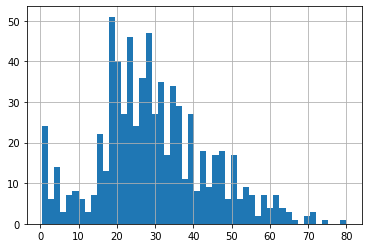

In [ ]:
df.Age.hist(bins=50)

In [ ]:
extreme = df.Age.mean()+3*df.Age.std()

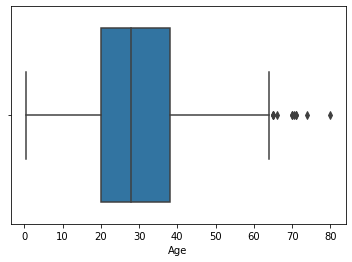

In [ ]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [ ]:
def impute_nan(df,variable, median,extreme):
  df[variable+"_end_distribution"]=df[variable].fillna(extreme) # new variable with extreme values
  df[variable].fillna(median,inplace=True) # missing values with median

In [ ]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


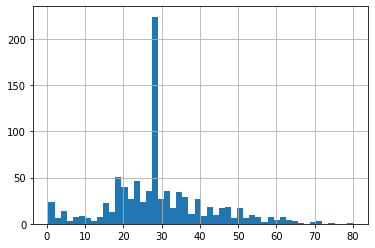

In [ ]:
df['Age'].hist(bins=50)

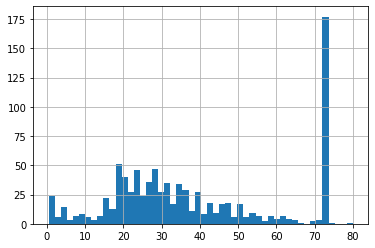

In [ ]:
df['Age_end_distribution'].hist(bins=50)

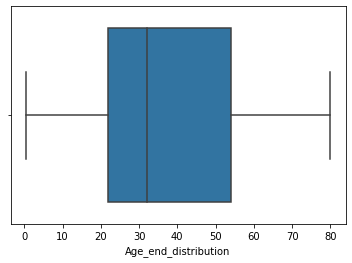

In [ ]:
sns.boxplot('Age_end_distribution', data=df)